# Detectron2: Zebrafish

## Install detectron2


## Train on a custom dataset

In [1]:
# general
import os

# custom code
import zebrafish.trainers.TrainingUtil as TrainingUtil

from zebrafish.configs import get_instance_segmentation_config
from zebrafish.trainers.CocoTrainer import CocoTrainer
from zebrafish.visualization import plot_train_vs_validation_loss, plot_dataset, plot_prediction
from zebrafish.dataset import register_datasets

#detectron
from detectron2.utils.logger import setup_logger


setup_logger()

if "notebooks" in os.getcwd() and "colab" in os.getcwd():
    os.chdir("..")
    os.chdir("..")


In [2]:
use_direction_classes = False
register_datasets("dataset", use_direction_classes=use_direction_classes)

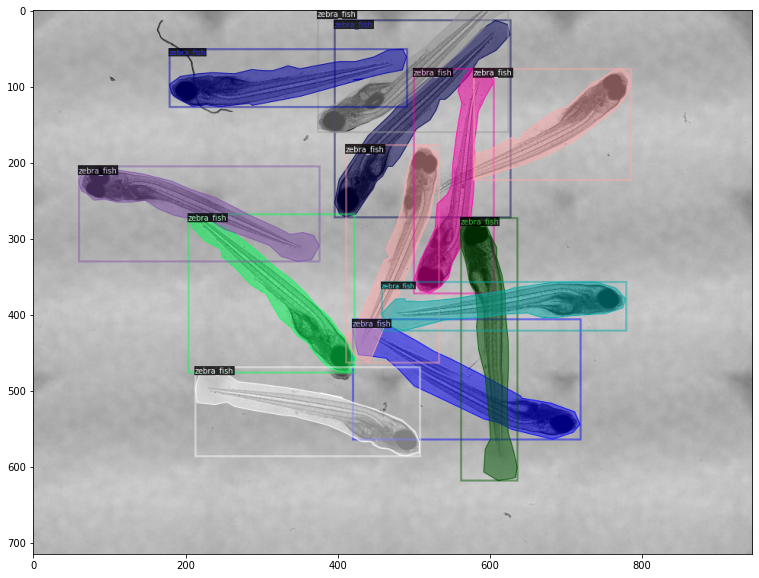

In [3]:
plot_dataset("train")

Here we fine tune a model from the zoo to our dataset.

In [4]:
train_set = "train"
val_set = "val"
max_iter = 1000


cfg = get_instance_segmentation_config(
    train_set, 
    val_set, 
    max_iter=max_iter,
)

In [5]:
cfg.SOLVER.MAX_ITER = 2000

In [6]:
resume = True
TrainingUtil.train(cfg, resume=resume)

[05/25 09:43:45 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[05/25 09:43:45 d2.data.build]: Removed 0 images with no usable annotations. 5 images left.
[05/25 09:43:45 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
| zebra_fish | 69           |
|            |              |
[05/25 09:43:45 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[05/25 09:43:45 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/25 09:43:45 d2.data.detection_utils]: TransformGens used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[05/25 09:43:45 d2.data.build]: Using training sampler TrainingSampler
[05/25 09:43:45 d2.data.detection_utils]: TransformGens used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[05/25 09:43:45 d2.data.common]: Serializing 5 elements to byte tensors

[05/25 09:44:14 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.17s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all 

DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.353
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.776
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.244
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.597
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.301
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.035
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.326
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.535
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.600
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.518
[05/25 09:44:42 d2.eva

[05/25 09:44:57 d2.utils.events]:  eta: 0:16:44  iter: 99  total_loss: 1.388  loss_cls: 0.304  loss_box_reg: 0.554  loss_mask: 0.447  loss_rpn_cls: 0.008  loss_rpn_loc: 0.072  validation_loss: 1.694  time: 0.5295  data_time: 0.0123  lr: 0.000200  max_mem: 5043M
[05/25 09:45:07 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ...
[05/25 09:45:07 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/25 09:45:07 d2.evaluation.evaluator]: Start inference on 5 images
[05/25 09:45:09 d2.evaluation.evaluator]: Total inference time: 0:00:00.295213 (0.295213 s / img per device, on 1 devices)
[05/25 09:45:09 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.075096 s / img per device, on 1 devices)
[05/25 09:45:09 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/25 09:45:09 d2.evaluation.coco_evaluation]: Saving results to output/2020_05_25_09_43_43/inference/coco_instances_results.json
[05/25 09:45:09 d2.evaluation

[05/25 09:45:22 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:45:22 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:45:22 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:45:22 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:45:22 d2.evaluation.testing]: copypaste: 60.4748,99.0626,68.1891,nan,67.1287,58.6764
[05/25 09:45:22 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:45:22 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:45:22 d2.evaluation.testing]: copypaste: 31.4472,79.8063,21.6289,nan,49.9811,28.5838
[05/25 09:45:23 d2.utils.events]:  eta: 0:16:14  iter: 139  total_loss: 1.140  loss_cls: 0.250  loss_box_reg: 0.521  loss_mask: 0.356  loss_rpn_cls: 0.006  loss_rpn_loc: 0.061  validation_loss: 1.583  time: 0.5269  data_time: 0.0115  lr: 0.000279  max_mem: 5043M
[05/25 09:45:33 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:45:47 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:45:47 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:45:47 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:45:47 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:45:47 d2.evaluation.testing]: copypaste: 61.2961,97.4744,80.5233,nan,71.4851,59.1055
[05/25 09:45:47 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:45:47 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:45:47 d2.evaluation.testing]: copypaste: 42.5559,89.3289,31.2485,nan,57.8108,39.5155
[05/25 09:45:47 d2.utils.events]:  eta: 0:15:52  iter: 179  total_loss: 0.840  loss_cls: 0.195  loss_box_reg: 0.349  loss_mask: 0.235  loss_rpn_cls: 0.005  loss_rpn_loc: 0.059  validation_loss: 1.207  time: 0.5261  data_time: 0.0113  lr: 0.000359  max_mem: 5043M
[05/25 09:45:58 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:46:12 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:46:12 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:46:12 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:46:12 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:46:12 d2.evaluation.testing]: copypaste: 61.6425,97.9780,70.2892,nan,72.8713,58.8857
[05/25 09:46:12 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:46:12 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:46:12 d2.evaluation.testing]: copypaste: 47.2071,92.4001,52.6628,nan,62.9415,43.7626
[05/25 09:46:12 d2.utils.events]:  eta: 0:15:34  iter: 219  total_loss: 0.773  loss_cls: 0.159  loss_box_reg: 0.310  loss_mask: 0.245  loss_rpn_cls: 0.003  loss_rpn_loc: 0.053  validation_loss: 1.207  time: 0.5275  data_time: 0.0116  lr: 0.000439  max_mem: 5043M
[05/25 09:46:23 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:46:36 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:46:36 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:46:36 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:46:36 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:46:36 d2.evaluation.testing]: copypaste: 65.1468,98.9456,90.2028,nan,72.1782,63.6301
[05/25 09:46:36 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:46:36 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:46:36 d2.evaluation.testing]: copypaste: 45.3980,91.3938,46.3448,nan,61.6424,42.1225
[05/25 09:46:37 d2.utils.events]:  eta: 0:15:12  iter: 259  total_loss: 0.686  loss_cls: 0.129  loss_box_reg: 0.279  loss_mask: 0.191  loss_rpn_cls: 0.003  loss_rpn_loc: 0.047  validation_loss: 1.001  time: 0.5288  data_time: 0.0114  lr: 0.000519  max_mem: 5043M
[05/25 09:46:48 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:47:01 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:47:01 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:47:01 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:47:01 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:47:01 d2.evaluation.testing]: copypaste: 66.3734,97.8084,85.6084,nan,75.7426,64.3247
[05/25 09:47:01 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:47:01 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:47:01 d2.evaluation.testing]: copypaste: 50.3867,91.6919,51.2591,nan,67.4563,46.8859
[05/25 09:47:02 d2.utils.events]:  eta: 0:14:54  iter: 299  total_loss: 0.741  loss_cls: 0.136  loss_box_reg: 0.302  loss_mask: 0.218  loss_rpn_cls: 0.002  loss_rpn_loc: 0.042  validation_loss: 0.901  time: 0.5297  data_time: 0.0113  lr: 0.000599  max_mem: 5043M
[05/25 09:47:13 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:47:26 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:47:26 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:47:26 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:47:26 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:47:26 d2.evaluation.testing]: copypaste: 68.2858,99.7019,88.2290,nan,78.6139,66.6924
[05/25 09:47:26 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:47:26 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:47:26 d2.evaluation.testing]: copypaste: 53.5035,93.1341,65.4360,nan,63.8318,51.4510
[05/25 09:47:27 d2.utils.events]:  eta: 0:14:32  iter: 339  total_loss: 0.748  loss_cls: 0.157  loss_box_reg: 0.314  loss_mask: 0.210  loss_rpn_cls: 0.002  loss_rpn_loc: 0.046  validation_loss: 0.854  time: 0.5299  data_time: 0.0119  lr: 0.000679  max_mem: 5043M
[05/25 09:47:38 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:47:51 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:47:51 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:47:51 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:47:51 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:47:51 d2.evaluation.testing]: copypaste: 67.2140,98.0198,87.1657,nan,76.3366,65.6813
[05/25 09:47:51 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:47:51 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:47:51 d2.evaluation.testing]: copypaste: 52.0962,93.4111,59.6265,nan,67.4295,48.9641
[05/25 09:47:52 d2.utils.events]:  eta: 0:14:09  iter: 379  total_loss: 0.618  loss_cls: 0.124  loss_box_reg: 0.277  loss_mask: 0.174  loss_rpn_cls: 0.002  loss_rpn_loc: 0.044  validation_loss: 0.774  time: 0.5294  data_time: 0.0111  lr: 0.000758  max_mem: 5043M
[05/25 09:48:02 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:48:15 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:48:15 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:48:15 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:48:15 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:48:15 d2.evaluation.testing]: copypaste: 70.7008,98.0055,90.8817,nan,76.5347,69.4853
[05/25 09:48:15 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:48:15 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:48:15 d2.evaluation.testing]: copypaste: 57.9440,96.9575,76.1572,nan,69.5063,55.2848
[05/25 09:48:16 d2.utils.events]:  eta: 0:13:48  iter: 419  total_loss: 0.674  loss_cls: 0.134  loss_box_reg: 0.297  loss_mask: 0.205  loss_rpn_cls: 0.002  loss_rpn_loc: 0.042  validation_loss: 0.767  time: 0.5286  data_time: 0.0112  lr: 0.000838  max_mem: 5043M
[05/25 09:48:26 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:48:40 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:48:40 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:48:40 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:48:40 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:48:40 d2.evaluation.testing]: copypaste: 66.0620,96.6727,89.9124,nan,73.3663,64.8167
[05/25 09:48:40 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:48:40 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:48:40 d2.evaluation.testing]: copypaste: 55.1126,92.5188,68.5115,nan,66.9787,52.6901
[05/25 09:48:40 d2.utils.events]:  eta: 0:13:27  iter: 459  total_loss: 0.674  loss_cls: 0.117  loss_box_reg: 0.330  loss_mask: 0.206  loss_rpn_cls: 0.004  loss_rpn_loc: 0.042  validation_loss: 0.701  time: 0.5286  data_time: 0.0121  lr: 0.000918  max_mem: 5043M
[05/25 09:48:51 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:49:04 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:49:04 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:49:04 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:49:04 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:49:04 d2.evaluation.testing]: copypaste: 70.8830,96.9723,94.4514,nan,74.2574,70.2023
[05/25 09:49:04 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:49:04 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:49:04 d2.evaluation.testing]: copypaste: 58.8404,93.0693,72.3084,nan,72.4455,55.3110
[05/25 09:49:05 d2.utils.events]:  eta: 0:13:05  iter: 499  total_loss: 0.615  loss_cls: 0.140  loss_box_reg: 0.272  loss_mask: 0.149  loss_rpn_cls: 0.002  loss_rpn_loc: 0.039  validation_loss: 0.695  time: 0.5284  data_time: 0.0123  lr: 0.000998  max_mem: 5043M
[05/25 09:49:15 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:49:29 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:49:29 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:49:29 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:49:29 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:49:29 d2.evaluation.testing]: copypaste: 73.7674,98.0198,92.2751,nan,78.6139,72.7965
[05/25 09:49:29 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:49:29 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:49:29 d2.evaluation.testing]: copypaste: 62.4898,97.0006,82.0319,nan,74.5303,59.4050
[05/25 09:49:30 d2.utils.events]:  eta: 0:12:45  iter: 539  total_loss: 0.574  loss_cls: 0.091  loss_box_reg: 0.232  loss_mask: 0.162  loss_rpn_cls: 0.002  loss_rpn_loc: 0.037  validation_loss: 0.640  time: 0.5291  data_time: 0.0126  lr: 0.001000  max_mem: 5043M
[05/25 09:49:40 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:49:54 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:49:54 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:49:54 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:49:54 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:49:54 d2.evaluation.testing]: copypaste: 71.6593,97.9488,96.9181,nan,75.7426,71.1020
[05/25 09:49:54 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:49:54 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:49:54 d2.evaluation.testing]: copypaste: 59.9769,96.8590,74.5490,nan,74.4310,56.8622
[05/25 09:49:54 d2.utils.events]:  eta: 0:12:25  iter: 579  total_loss: 0.584  loss_cls: 0.142  loss_box_reg: 0.253  loss_mask: 0.154  loss_rpn_cls: 0.002  loss_rpn_loc: 0.037  validation_loss: 0.628  time: 0.5293  data_time: 0.0119  lr: 0.001000  max_mem: 5043M
[05/25 09:50:05 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:50:18 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:50:18 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:50:18 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:50:18 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:50:18 d2.evaluation.testing]: copypaste: 77.0198,99.7277,97.0297,nan,86.4356,75.4337
[05/25 09:50:18 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:50:18 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:50:18 d2.evaluation.testing]: copypaste: 61.4041,97.0297,76.5897,nan,77.5248,58.2730
[05/25 09:50:18 d2.utils.events]:  eta: 0:12:03  iter: 619  total_loss: 0.561  loss_cls: 0.110  loss_box_reg: 0.248  loss_mask: 0.161  loss_rpn_cls: 0.002  loss_rpn_loc: 0.035  validation_loss: 0.613  time: 0.5289  data_time: 0.0120  lr: 0.001000  max_mem: 5043M
[05/25 09:50:29 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:50:43 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:50:43 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:50:43 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:50:43 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:50:43 d2.evaluation.testing]: copypaste: 78.3878,99.9299,94.9904,nan,86.5347,77.1965
[05/25 09:50:43 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:50:43 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:50:43 d2.evaluation.testing]: copypaste: 64.2389,93.8959,81.7159,nan,76.8469,61.2450
[05/25 09:50:43 d2.utils.events]:  eta: 0:11:42  iter: 659  total_loss: 0.599  loss_cls: 0.153  loss_box_reg: 0.231  loss_mask: 0.153  loss_rpn_cls: 0.002  loss_rpn_loc: 0.037  validation_loss: 0.574  time: 0.5290  data_time: 0.0123  lr: 0.001000  max_mem: 5043M
[05/25 09:50:54 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:51:07 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:51:07 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:51:07 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:51:07 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:51:07 d2.evaluation.testing]: copypaste: 68.6355,99.4734,97.0006,nan,76.5347,67.1024
[05/25 09:51:07 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:51:07 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:51:07 d2.evaluation.testing]: copypaste: 58.8932,88.1396,76.2869,nan,75.3110,54.7915
[05/25 09:51:08 d2.utils.events]:  eta: 0:11:21  iter: 699  total_loss: 0.565  loss_cls: 0.106  loss_box_reg: 0.262  loss_mask: 0.164  loss_rpn_cls: 0.002  loss_rpn_loc: 0.039  validation_loss: 0.571  time: 0.5292  data_time: 0.0120  lr: 0.001000  max_mem: 5043M
[05/25 09:51:19 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:51:32 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:51:32 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:51:32 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:51:32 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:51:32 d2.evaluation.testing]: copypaste: 74.5990,97.0297,94.9461,nan,78.6139,73.6079
[05/25 09:51:32 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:51:32 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:51:32 d2.evaluation.testing]: copypaste: 68.0235,97.0297,89.2660,nan,76.0660,66.0018
[05/25 09:51:33 d2.utils.events]:  eta: 0:11:00  iter: 739  total_loss: 0.517  loss_cls: 0.117  loss_box_reg: 0.234  loss_mask: 0.143  loss_rpn_cls: 0.002  loss_rpn_loc: 0.034  validation_loss: 0.574  time: 0.5297  data_time: 0.0119  lr: 0.001000  max_mem: 5043M
[05/25 09:51:43 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:51:57 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:51:57 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:51:57 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:51:57 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:51:57 d2.evaluation.testing]: copypaste: 78.0751,98.0198,94.7244,nan,87.2277,76.3323
[05/25 09:51:57 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:51:57 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:51:57 d2.evaluation.testing]: copypaste: 67.6582,94.7054,87.6983,nan,78.8543,64.9390
[05/25 09:51:57 d2.utils.events]:  eta: 0:10:39  iter: 779  total_loss: 0.483  loss_cls: 0.089  loss_box_reg: 0.223  loss_mask: 0.128  loss_rpn_cls: 0.002  loss_rpn_loc: 0.031  validation_loss: 0.548  time: 0.5294  data_time: 0.0123  lr: 0.001000  max_mem: 5043M
[05/25 09:52:08 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:52:21 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:52:21 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:52:21 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:52:21 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:52:21 d2.evaluation.testing]: copypaste: 76.3074,98.0198,97.0297,nan,78.6139,76.1445
[05/25 09:52:21 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:52:21 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:52:21 d2.evaluation.testing]: copypaste: 68.0098,96.6220,93.5470,nan,75.8133,66.1314
[05/25 09:52:21 d2.utils.events]:  eta: 0:10:18  iter: 819  total_loss: 0.481  loss_cls: 0.070  loss_box_reg: 0.231  loss_mask: 0.139  loss_rpn_cls: 0.001  loss_rpn_loc: 0.028  validation_loss: 0.538  time: 0.5292  data_time: 0.0122  lr: 0.001000  max_mem: 5043M
[05/25 09:52:32 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:52:45 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:52:45 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:52:45 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:52:45 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:52:45 d2.evaluation.testing]: copypaste: 75.0290,98.0198,93.9116,nan,82.9703,74.3552
[05/25 09:52:45 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:52:45 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:52:45 d2.evaluation.testing]: copypaste: 60.9384,93.7906,78.5479,nan,76.3384,58.0653
[05/25 09:52:46 d2.utils.events]:  eta: 0:09:57  iter: 859  total_loss: 0.531  loss_cls: 0.110  loss_box_reg: 0.202  loss_mask: 0.144  loss_rpn_cls: 0.001  loss_rpn_loc: 0.031  validation_loss: 0.525  time: 0.5287  data_time: 0.0113  lr: 0.001000  max_mem: 5043M
[05/25 09:52:57 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:53:10 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:53:10 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:53:10 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:53:10 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:53:10 d2.evaluation.testing]: copypaste: 72.8710,96.9301,96.8414,nan,77.8218,71.7532
[05/25 09:53:10 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:53:10 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:53:10 d2.evaluation.testing]: copypaste: 65.8929,90.8808,87.5548,nan,75.3819,63.2844
[05/25 09:53:10 d2.utils.events]:  eta: 0:09:36  iter: 899  total_loss: 0.536  loss_cls: 0.110  loss_box_reg: 0.217  loss_mask: 0.115  loss_rpn_cls: 0.002  loss_rpn_loc: 0.032  validation_loss: 0.505  time: 0.5290  data_time: 0.0126  lr: 0.001000  max_mem: 5043M
[05/25 09:53:21 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:53:34 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:53:34 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:53:34 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:53:34 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:53:34 d2.evaluation.testing]: copypaste: 75.7799,98.0198,94.3254,nan,82.8713,74.6290
[05/25 09:53:34 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:53:34 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:53:34 d2.evaluation.testing]: copypaste: 67.2436,93.7740,85.0906,nan,79.4272,64.5682
[05/25 09:53:35 d2.utils.events]:  eta: 0:09:15  iter: 939  total_loss: 0.475  loss_cls: 0.076  loss_box_reg: 0.209  loss_mask: 0.147  loss_rpn_cls: 0.001  loss_rpn_loc: 0.030  validation_loss: 0.487  time: 0.5292  data_time: 0.0122  lr: 0.001000  max_mem: 5043M
[05/25 09:53:46 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:53:59 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:53:59 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:53:59 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:53:59 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:53:59 d2.evaluation.testing]: copypaste: 75.4032,97.9768,97.0006,nan,83.4653,74.4890
[05/25 09:53:59 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:53:59 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:53:59 d2.evaluation.testing]: copypaste: 68.4648,97.0006,87.8347,nan,73.5796,67.2957
[05/25 09:53:59 d2.utils.events]:  eta: 0:08:55  iter: 979  total_loss: 0.499  loss_cls: 0.095  loss_box_reg: 0.227  loss_mask: 0.126  loss_rpn_cls: 0.002  loss_rpn_loc: 0.030  validation_loss: 0.471  time: 0.5293  data_time: 0.0124  lr: 0.001000  max_mem: 5043M
[05/25 09:54:10 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all ..

[05/25 09:54:24 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:54:24 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:54:24 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:54:24 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:54:24 d2.evaluation.testing]: copypaste: 78.8405,97.9274,94.7540,nan,88.5149,77.2287
[05/25 09:54:24 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:54:24 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:54:24 d2.evaluation.testing]: copypaste: 67.5004,93.3010,86.9271,nan,77.4069,65.2073
[05/25 09:54:24 d2.utils.events]:  eta: 0:08:33  iter: 1019  total_loss: 0.546  loss_cls: 0.163  loss_box_reg: 0.195  loss_mask: 0.133  loss_rpn_cls: 0.002  loss_rpn_loc: 0.030  validation_loss: 0.464  time: 0.5294  data_time: 0.0120  lr: 0.001000  max_mem: 5043M
[05/25 09:54:35 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 09:54:48 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:54:48 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:54:48 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:54:48 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:54:48 d2.evaluation.testing]: copypaste: 77.0266,97.9648,88.1779,nan,88.5149,75.5769
[05/25 09:54:48 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:54:48 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:54:48 d2.evaluation.testing]: copypaste: 64.1392,90.7563,82.5310,nan,80.6860,60.9634
[05/25 09:54:49 d2.utils.events]:  eta: 0:08:13  iter: 1059  total_loss: 0.423  loss_cls: 0.075  loss_box_reg: 0.185  loss_mask: 0.112  loss_rpn_cls: 0.001  loss_rpn_loc: 0.029  validation_loss: 0.464  time: 0.5296  data_time: 0.0115  lr: 0.001000  max_mem: 5043M
[05/25 09:54:59 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 09:55:13 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:55:13 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:55:13 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:55:13 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:55:13 d2.evaluation.testing]: copypaste: 76.3029,97.0297,97.0297,nan,84.2574,74.7951
[05/25 09:55:13 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:55:13 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:55:13 d2.evaluation.testing]: copypaste: 69.9353,97.0297,88.7955,nan,78.6359,68.1277
[05/25 09:55:13 d2.utils.events]:  eta: 0:07:51  iter: 1099  total_loss: 0.541  loss_cls: 0.144  loss_box_reg: 0.230  loss_mask: 0.126  loss_rpn_cls: 0.002  loss_rpn_loc: 0.027  validation_loss: 0.438  time: 0.5294  data_time: 0.0105  lr: 0.001000  max_mem: 5043M
[05/25 09:55:23 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 09:55:37 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:55:37 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:55:37 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:55:37 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:55:37 d2.evaluation.testing]: copypaste: 77.8006,97.9520,94.9608,nan,84.9505,76.5343
[05/25 09:55:37 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:55:37 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:55:37 d2.evaluation.testing]: copypaste: 66.8177,97.0297,86.5169,nan,79.0627,64.2372
[05/25 09:55:37 d2.utils.events]:  eta: 0:07:30  iter: 1139  total_loss: 0.424  loss_cls: 0.088  loss_box_reg: 0.198  loss_mask: 0.113  loss_rpn_cls: 0.002  loss_rpn_loc: 0.029  validation_loss: 0.438  time: 0.5290  data_time: 0.0121  lr: 0.001000  max_mem: 5043M
[05/25 09:55:48 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 09:56:01 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:56:01 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:56:01 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:56:01 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:56:01 d2.evaluation.testing]: copypaste: 79.9883,99.8416,95.0495,nan,85.8416,78.8863
[05/25 09:56:01 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:56:01 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:56:01 d2.evaluation.testing]: copypaste: 69.3372,94.3013,88.5869,nan,79.6747,66.7280
[05/25 09:56:02 d2.utils.events]:  eta: 0:07:10  iter: 1179  total_loss: 0.526  loss_cls: 0.117  loss_box_reg: 0.203  loss_mask: 0.149  loss_rpn_cls: 0.002  loss_rpn_loc: 0.027  validation_loss: 0.438  time: 0.5290  data_time: 0.0118  lr: 0.001000  max_mem: 5043M
[05/25 09:56:12 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 09:56:26 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:56:26 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:56:26 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:56:26 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:56:26 d2.evaluation.testing]: copypaste: 77.0467,97.8312,97.0297,nan,85.0495,75.2947
[05/25 09:56:26 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:56:26 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:56:26 d2.evaluation.testing]: copypaste: 66.9561,91.3913,81.5268,nan,78.2744,64.4347
[05/25 09:56:26 d2.utils.events]:  eta: 0:06:48  iter: 1219  total_loss: 0.500  loss_cls: 0.081  loss_box_reg: 0.196  loss_mask: 0.132  loss_rpn_cls: 0.002  loss_rpn_loc: 0.027  validation_loss: 0.451  time: 0.5289  data_time: 0.0116  lr: 0.001000  max_mem: 5043M
[05/25 09:56:37 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 09:56:50 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:56:50 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:56:50 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:56:50 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:56:50 d2.evaluation.testing]: copypaste: 73.9397,96.9723,93.2943,nan,84.2574,71.9187
[05/25 09:56:50 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:56:50 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:56:50 d2.evaluation.testing]: copypaste: 69.0611,95.0495,87.7185,nan,77.9180,67.2132
[05/25 09:56:51 d2.utils.events]:  eta: 0:06:27  iter: 1259  total_loss: 0.477  loss_cls: 0.103  loss_box_reg: 0.231  loss_mask: 0.129  loss_rpn_cls: 0.001  loss_rpn_loc: 0.026  validation_loss: 0.464  time: 0.5287  data_time: 0.0115  lr: 0.001000  max_mem: 5043M
[05/25 09:57:01 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 09:57:14 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:57:14 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:57:14 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:57:14 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:57:14 d2.evaluation.testing]: copypaste: 76.7055,97.0297,93.1893,nan,86.4356,74.6088
[05/25 09:57:14 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:57:14 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:57:14 d2.evaluation.testing]: copypaste: 66.8413,92.6643,80.0675,nan,83.7871,63.3814
[05/25 09:57:15 d2.utils.events]:  eta: 0:06:06  iter: 1299  total_loss: 0.384  loss_cls: 0.075  loss_box_reg: 0.175  loss_mask: 0.107  loss_rpn_cls: 0.001  loss_rpn_loc: 0.027  validation_loss: 0.464  time: 0.5288  data_time: 0.0118  lr: 0.001000  max_mem: 5043M
[05/25 09:57:26 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 09:57:39 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:57:39 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:57:39 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:57:39 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:57:39 d2.evaluation.testing]: copypaste: 77.1727,98.0198,91.1957,nan,84.3564,75.8863
[05/25 09:57:39 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:57:39 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:57:39 d2.evaluation.testing]: copypaste: 70.9118,96.6874,85.4904,nan,77.9208,69.3314
[05/25 09:57:40 d2.utils.events]:  eta: 0:05:45  iter: 1339  total_loss: 0.473  loss_cls: 0.082  loss_box_reg: 0.214  loss_mask: 0.128  loss_rpn_cls: 0.001  loss_rpn_loc: 0.026  validation_loss: 0.451  time: 0.5289  data_time: 0.0123  lr: 0.001000  max_mem: 5043M
[05/25 09:57:50 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 09:58:03 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:58:03 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:58:03 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:58:03 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:58:03 d2.evaluation.testing]: copypaste: 79.5968,98.0055,98.0055,nan,88.6139,78.4818
[05/25 09:58:03 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:58:03 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:58:03 d2.evaluation.testing]: copypaste: 72.5837,96.6324,92.4211,nan,82.7030,70.4889
[05/25 09:58:03 d2.utils.events]:  eta: 0:05:24  iter: 1379  total_loss: 0.414  loss_cls: 0.068  loss_box_reg: 0.196  loss_mask: 0.113  loss_rpn_cls: 0.001  loss_rpn_loc: 0.026  validation_loss: 0.451  time: 0.5285  data_time: 0.0121  lr: 0.001000  max_mem: 5043M
[05/25 09:58:14 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 09:58:27 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:58:27 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:58:27 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:58:27 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:58:27 d2.evaluation.testing]: copypaste: 81.2506,97.9520,95.0495,nan,87.8218,80.4918
[05/25 09:58:27 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:58:27 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:58:27 d2.evaluation.testing]: copypaste: 73.8600,97.0297,86.7765,nan,83.7228,72.0139
[05/25 09:58:27 d2.utils.events]:  eta: 0:05:03  iter: 1419  total_loss: 0.420  loss_cls: 0.062  loss_box_reg: 0.187  loss_mask: 0.112  loss_rpn_cls: 0.001  loss_rpn_loc: 0.025  validation_loss: 0.437  time: 0.5282  data_time: 0.0119  lr: 0.001000  max_mem: 5043M
[05/25 09:58:38 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 09:58:51 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:58:51 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:58:51 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:58:51 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:58:51 d2.evaluation.testing]: copypaste: 79.1873,97.0297,94.6505,nan,85.0495,77.9496
[05/25 09:58:51 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:58:51 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:58:51 d2.evaluation.testing]: copypaste: 71.7357,94.6505,91.1656,nan,80.3748,69.7169
[05/25 09:58:52 d2.utils.events]:  eta: 0:04:42  iter: 1459  total_loss: 0.386  loss_cls: 0.056  loss_box_reg: 0.175  loss_mask: 0.119  loss_rpn_cls: 0.001  loss_rpn_loc: 0.025  validation_loss: 0.436  time: 0.5282  data_time: 0.0116  lr: 0.001000  max_mem: 5043M
[05/25 09:59:02 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 09:59:16 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:59:16 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:59:16 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:59:16 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:59:16 d2.evaluation.testing]: copypaste: 78.8166,99.7165,96.3159,nan,79.2079,78.6774
[05/25 09:59:16 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:59:16 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:59:16 d2.evaluation.testing]: copypaste: 72.0044,94.4732,91.3906,nan,78.0198,70.6262
[05/25 09:59:16 d2.utils.events]:  eta: 0:04:21  iter: 1499  total_loss: 0.377  loss_cls: 0.065  loss_box_reg: 0.174  loss_mask: 0.108  loss_rpn_cls: 0.002  loss_rpn_loc: 0.022  validation_loss: 0.436  time: 0.5282  data_time: 0.0112  lr: 0.001000  max_mem: 5043M
[05/25 09:59:27 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 09:59:40 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 09:59:40 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 09:59:40 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 09:59:40 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:59:40 d2.evaluation.testing]: copypaste: 77.0283,96.8669,94.8646,nan,83.6634,75.7139
[05/25 09:59:40 d2.evaluation.testing]: copypaste: Task: segm
[05/25 09:59:40 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 09:59:40 d2.evaluation.testing]: copypaste: 70.6514,93.7815,86.2235,nan,81.0750,68.4284
[05/25 09:59:41 d2.utils.events]:  eta: 0:04:00  iter: 1539  total_loss: 0.413  loss_cls: 0.080  loss_box_reg: 0.188  loss_mask: 0.112  loss_rpn_cls: 0.001  loss_rpn_loc: 0.022  validation_loss: 0.420  time: 0.5282  data_time: 0.0117  lr: 0.001000  max_mem: 5043M
[05/25 09:59:51 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 10:00:04 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 10:00:04 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 10:00:04 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 10:00:04 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:00:04 d2.evaluation.testing]: copypaste: 75.9271,98.0198,96.8987,nan,85.0495,74.7004
[05/25 10:00:04 d2.evaluation.testing]: copypaste: Task: segm
[05/25 10:00:04 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:00:04 d2.evaluation.testing]: copypaste: 72.0564,97.0297,82.5546,nan,84.5934,69.3095
[05/25 10:00:05 d2.utils.events]:  eta: 0:03:39  iter: 1579  total_loss: 0.354  loss_cls: 0.064  loss_box_reg: 0.179  loss_mask: 0.107  loss_rpn_cls: 0.001  loss_rpn_loc: 0.023  validation_loss: 0.420  time: 0.5281  data_time: 0.0118  lr: 0.001000  max_mem: 5043M
[05/25 10:00:16 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 10:00:29 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 10:00:29 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 10:00:29 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 10:00:29 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:00:29 d2.evaluation.testing]: copypaste: 77.4565,97.9395,95.0495,nan,84.9505,76.1244
[05/25 10:00:29 d2.evaluation.testing]: copypaste: Task: segm
[05/25 10:00:29 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:00:29 d2.evaluation.testing]: copypaste: 73.0185,97.0297,91.2447,nan,83.6119,70.5750
[05/25 10:00:29 d2.utils.events]:  eta: 0:03:18  iter: 1619  total_loss: 0.444  loss_cls: 0.068  loss_box_reg: 0.217  loss_mask: 0.120  loss_rpn_cls: 0.001  loss_rpn_loc: 0.023  validation_loss: 0.420  time: 0.5281  data_time: 0.0124  lr: 0.001000  max_mem: 5043M
[05/25 10:00:40 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 10:00:53 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 10:00:53 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 10:00:53 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 10:00:53 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:00:53 d2.evaluation.testing]: copypaste: 77.2087,97.9395,94.9608,nan,82.7723,76.5313
[05/25 10:00:53 d2.evaluation.testing]: copypaste: Task: segm
[05/25 10:00:53 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:00:53 d2.evaluation.testing]: copypaste: 72.4768,97.8230,90.2663,nan,80.2386,70.9845
[05/25 10:00:54 d2.utils.events]:  eta: 0:02:57  iter: 1659  total_loss: 0.405  loss_cls: 0.067  loss_box_reg: 0.170  loss_mask: 0.103  loss_rpn_cls: 0.001  loss_rpn_loc: 0.025  validation_loss: 0.399  time: 0.5281  data_time: 0.0119  lr: 0.001000  max_mem: 5043M
[05/25 10:01:04 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 10:01:17 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 10:01:17 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 10:01:17 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 10:01:17 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:01:17 d2.evaluation.testing]: copypaste: 76.1753,97.0006,93.7753,nan,82.0792,75.1762
[05/25 10:01:17 d2.evaluation.testing]: copypaste: Task: segm
[05/25 10:01:17 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:01:17 d2.evaluation.testing]: copypaste: 69.0559,95.0204,82.8170,nan,82.7042,66.1503
[05/25 10:01:18 d2.utils.events]:  eta: 0:02:37  iter: 1699  total_loss: 0.404  loss_cls: 0.079  loss_box_reg: 0.184  loss_mask: 0.108  loss_rpn_cls: 0.001  loss_rpn_loc: 0.023  validation_loss: 0.399  time: 0.5280  data_time: 0.0123  lr: 0.001000  max_mem: 5043M
[05/25 10:01:29 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 10:01:42 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 10:01:42 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 10:01:42 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 10:01:42 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:01:42 d2.evaluation.testing]: copypaste: 80.5280,97.8280,97.8280,nan,85.7426,79.9186
[05/25 10:01:42 d2.evaluation.testing]: copypaste: Task: segm
[05/25 10:01:42 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:01:42 d2.evaluation.testing]: copypaste: 73.1536,97.8280,89.1676,nan,82.7799,71.0550
[05/25 10:01:43 d2.utils.events]:  eta: 0:02:16  iter: 1739  total_loss: 0.380  loss_cls: 0.066  loss_box_reg: 0.181  loss_mask: 0.102  loss_rpn_cls: 0.001  loss_rpn_loc: 0.023  validation_loss: 0.399  time: 0.5283  data_time: 0.0124  lr: 0.001000  max_mem: 5043M
[05/25 10:01:53 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 10:02:06 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 10:02:06 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 10:02:06 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 10:02:06 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:02:06 d2.evaluation.testing]: copypaste: 82.9850,97.0297,97.0297,nan,89.9010,81.4275
[05/25 10:02:06 d2.evaluation.testing]: copypaste: Task: segm
[05/25 10:02:06 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:02:06 d2.evaluation.testing]: copypaste: 74.7466,95.0495,89.0618,nan,84.0368,72.6429
[05/25 10:02:07 d2.utils.events]:  eta: 0:01:55  iter: 1779  total_loss: 0.390  loss_cls: 0.055  loss_box_reg: 0.183  loss_mask: 0.104  loss_rpn_cls: 0.001  loss_rpn_loc: 0.022  validation_loss: 0.414  time: 0.5282  data_time: 0.0111  lr: 0.001000  max_mem: 5043M
[05/25 10:02:18 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 10:02:31 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 10:02:31 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 10:02:31 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 10:02:31 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:02:31 d2.evaluation.testing]: copypaste: 74.0700,97.9915,91.0451,nan,80.6931,72.7400
[05/25 10:02:31 d2.evaluation.testing]: copypaste: Task: segm
[05/25 10:02:31 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:02:31 d2.evaluation.testing]: copypaste: 68.5579,92.6949,81.3384,nan,82.0770,65.5004
[05/25 10:02:32 d2.utils.events]:  eta: 0:01:34  iter: 1819  total_loss: 0.405  loss_cls: 0.051  loss_box_reg: 0.175  loss_mask: 0.125  loss_rpn_cls: 0.001  loss_rpn_loc: 0.022  validation_loss: 0.401  time: 0.5283  data_time: 0.0118  lr: 0.001000  max_mem: 5043M
[05/25 10:02:42 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 10:02:56 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 10:02:56 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 10:02:56 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 10:02:56 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:02:56 d2.evaluation.testing]: copypaste: 80.1719,97.9520,97.0297,nan,87.8218,78.8251
[05/25 10:02:56 d2.evaluation.testing]: copypaste: Task: segm
[05/25 10:02:56 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:02:56 d2.evaluation.testing]: copypaste: 72.6759,97.9520,82.8946,nan,82.8218,70.4094
[05/25 10:02:56 d2.utils.events]:  eta: 0:01:13  iter: 1859  total_loss: 0.372  loss_cls: 0.055  loss_box_reg: 0.180  loss_mask: 0.103  loss_rpn_cls: 0.002  loss_rpn_loc: 0.023  validation_loss: 0.393  time: 0.5286  data_time: 0.0116  lr: 0.001000  max_mem: 5043M
[05/25 10:03:07 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 10:03:21 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 10:03:21 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 10:03:21 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 10:03:21 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:03:21 d2.evaluation.testing]: copypaste: 81.5005,98.0198,98.0198,nan,87.8218,80.8164
[05/25 10:03:21 d2.evaluation.testing]: copypaste: Task: segm
[05/25 10:03:21 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:03:21 d2.evaluation.testing]: copypaste: 75.9152,97.0006,93.9094,nan,83.4363,74.1483
[05/25 10:03:21 d2.utils.events]:  eta: 0:00:52  iter: 1899  total_loss: 0.437  loss_cls: 0.073  loss_box_reg: 0.178  loss_mask: 0.117  loss_rpn_cls: 0.001  loss_rpn_loc: 0.022  validation_loss: 0.414  time: 0.5288  data_time: 0.0116  lr: 0.001000  max_mem: 5043M
[05/25 10:03:32 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 10:03:46 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 10:03:46 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 10:03:46 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 10:03:46 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:03:46 d2.evaluation.testing]: copypaste: 75.1281,97.9915,97.9915,nan,80.0990,74.7881
[05/25 10:03:46 d2.evaluation.testing]: copypaste: Task: segm
[05/25 10:03:46 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:03:46 d2.evaluation.testing]: copypaste: 72.3901,96.9448,88.8474,nan,79.0618,70.8368
[05/25 10:03:46 d2.utils.events]:  eta: 0:00:31  iter: 1939  total_loss: 0.408  loss_cls: 0.075  loss_box_reg: 0.175  loss_mask: 0.118  loss_rpn_cls: 0.001  loss_rpn_loc: 0.022  validation_loss: 0.408  time: 0.5292  data_time: 0.0114  lr: 0.001000  max_mem: 5043M
[05/25 10:03:57 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

[05/25 10:04:11 d2.evaluation.coco_evaluation]: Note that some metrics cannot be computed.
[05/25 10:04:11 d2.engine.defaults]: Evaluation results for val in csv format:
[05/25 10:04:11 d2.evaluation.testing]: copypaste: Task: bbox
[05/25 10:04:11 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:04:11 d2.evaluation.testing]: copypaste: 77.9214,97.0297,93.9560,nan,87.2277,76.0645
[05/25 10:04:11 d2.evaluation.testing]: copypaste: Task: segm
[05/25 10:04:11 d2.evaluation.testing]: copypaste: AP,AP50,AP75,APs,APm,APl
[05/25 10:04:11 d2.evaluation.testing]: copypaste: 72.6775,96.2906,90.1059,nan,84.8011,69.7866
[05/25 10:04:11 d2.utils.events]:  eta: 0:00:10  iter: 1979  total_loss: 0.440  loss_cls: 0.099  loss_box_reg: 0.207  loss_mask: 0.107  loss_rpn_cls: 0.001  loss_rpn_loc: 0.022  validation_loss: 0.421  time: 0.5295  data_time: 0.0110  lr: 0.001000  max_mem: 5043M
[05/25 10:04:22 d2.data.common]: Serializing 5 elements to byte tensors and concatenating them all .

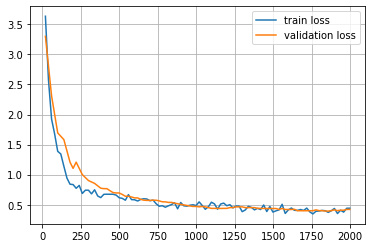

In [7]:
plot_train_vs_validation_loss(cfg)

Here we create a predictor using the learned weights.

Here we display the prediction for the unseen testset.

output/2020_05_25_09_43_43/model_final.pth


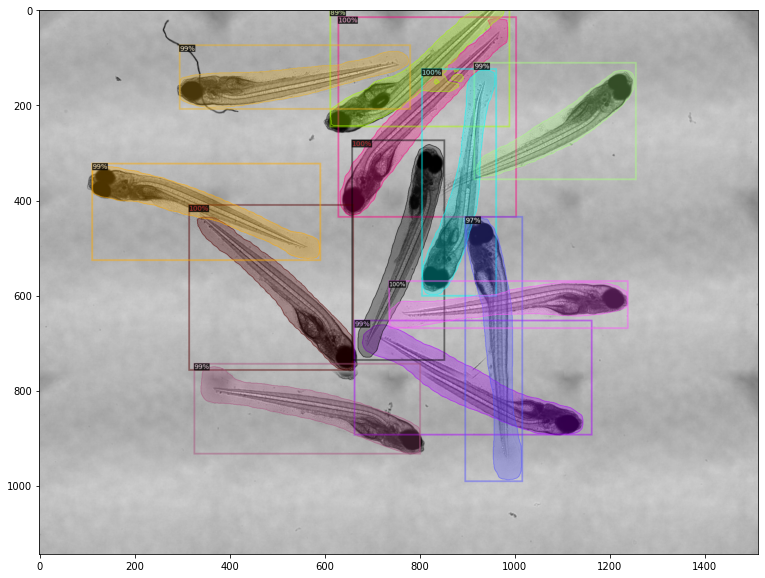

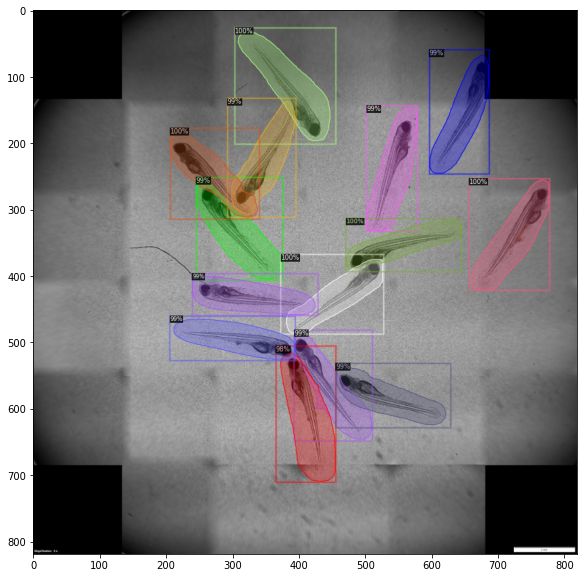

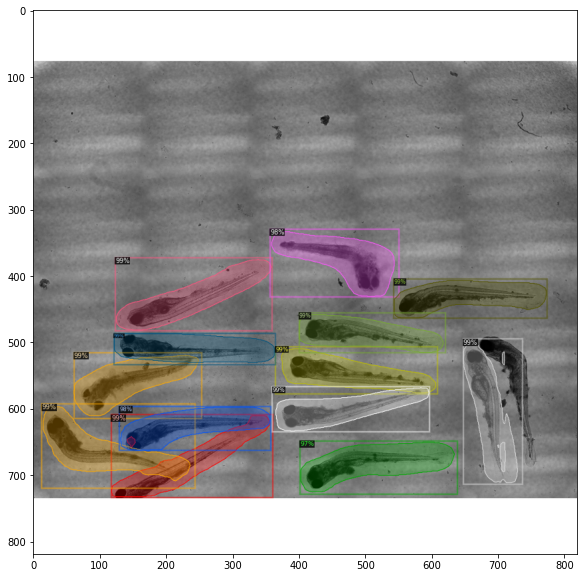

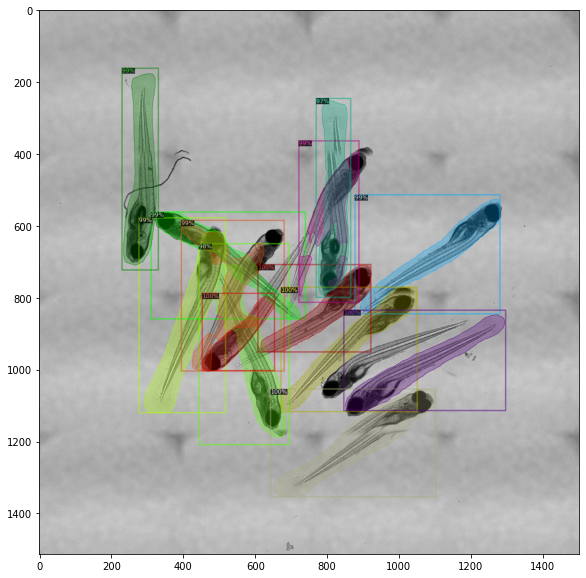

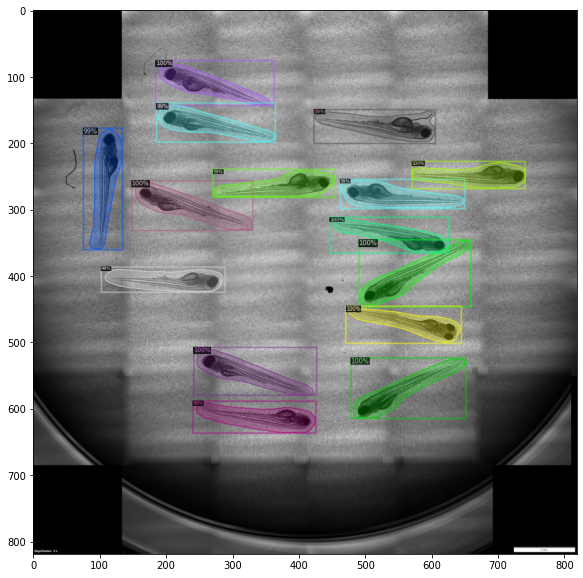

In [8]:
threshold = 0.5
n_images = 10
plot_prediction(cfg, "test", threshold=threshold, n_images=n_images)

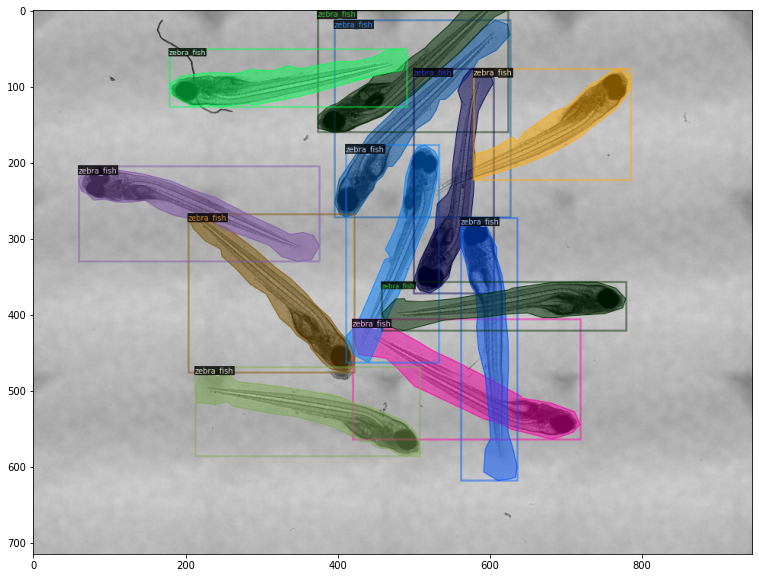

In [9]:
plot_dataset("test")